In [1]:
import gaussianfft
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from gaussianfft.util import EmpiricalVariogram
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,7]

In [2]:
def filter_deltas(m, d):
    # Filter nans
    deltas_nan = np.array(d)
    nan_cols = np.any(np.isnan(deltas_nan), axis=0)
    deltas_nan = deltas_nan[:, np.invert(nan_cols)]
    mid_nan = m[np.invert(nan_cols)]
    return mid_nan, deltas_nan, nan_cols

def plot_deltas(fig, ax, m, d):
    mid_nan, deltas_nan, _ = filter_deltas(m, d)
    
    mid_nan /= np.max(mid_nan)
    # Plot
    cf = ax.contourf(mid_nan, range_length_ratio, deltas_nan, 30, vmin=-0.15, vmax=0.15, cmap='bwr')
    return cf

In [3]:
# Setup
nx, ny, nz = 100, 1, 1
dx, dy, dz = 20, 20, 20
px, py, pz = nx, ny, nz
dr = 0.5 * dx
nmax = 10000
strategy = 'origo'
range_length_ratio = np.linspace(0.1, 2, 10)

# Derived constants
Lx, Ly, Lz = nx * dx, ny * dy, nz * dz
def simulate(vtype):
    # Simulation
    
    deltas = [[], []]
    true_variogram = []
    estimated_variograms = [[], []]
    for r in range_length_ratio:
        v = gaussianfft.variogram(vtype, Lx * r, Ly * r, Lz * r)
        ev = EmpiricalVariogram(v, nx, dx, ny, dy, nz, dz, px, py, pz)
        true_variogram.append(ev.true_variogram(dr))
        refs = ev.pick_reference_points(strategy)
        for dd, ee in zip(deltas, estimated_variograms):
            mid, estimated_variogram, _, _, convrg = ev.estimate_variogram(nmax, dr, refs, analyze_convergence=10)
            ee.append(estimated_variogram)
            dd.append(convrg.deltas[-1])
        # TODO: analyze convergence
    return mid, deltas, true_variogram, estimated_variograms

# Gaussian

In [4]:
variogram_type = 'gaussian'
mid, deltas, tcorr, ecorr = simulate(variogram_type)

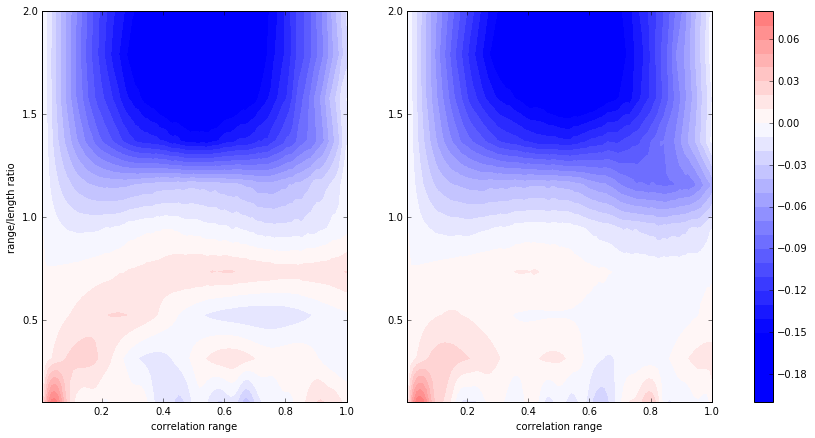

In [5]:
# Plot comparison
fig, axes = plt.subplots(nrows=1, ncols=2)
c = plot_deltas(fig, axes[0], mid, deltas[0])
c = plot_deltas(fig, axes[1], mid, deltas[1])
axes[0].set_ylabel('range/length ratio')
axes[0].set_xlabel('correlation range')
axes[1].set_xlabel('correlation range')
fig.colorbar(c, ax=axes.ravel().tolist())

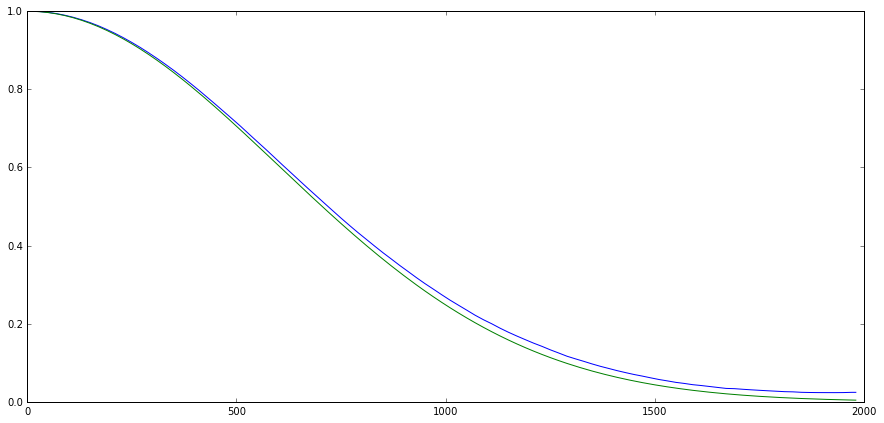

In [6]:
# Inspect variogram estimation
idelta = 0
ratio = 0.75

fmid, fdelta, nancols = filter_deltas(mid, deltas[idelta])
ir = np.argmin(np.abs(range_length_ratio - ratio))
evario = np.array(ecorr[idelta][ir])[np.invert(nancols)]
tvario = np.array(tcorr[ir])


plt.plot(fmid, evario)
plt.plot(tvario[0], tvario[1])
# plt.plot(fmid, fdelta[ir, :])

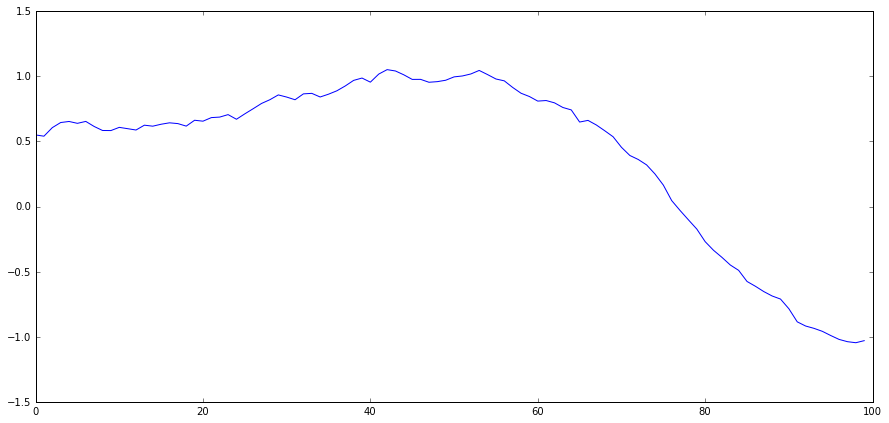

In [7]:
# Show a realization
v = gaussianfft.variogram(variogram_type, ratio * Lx)
f = gaussianfft.advanced.simulate(v, nx, dx, padx=px)
plt.plot(f)

# Spherical

In [8]:
variogram_type = 'spherical'
mid, deltas, tcorr, ecorr = simulate(variogram_type)

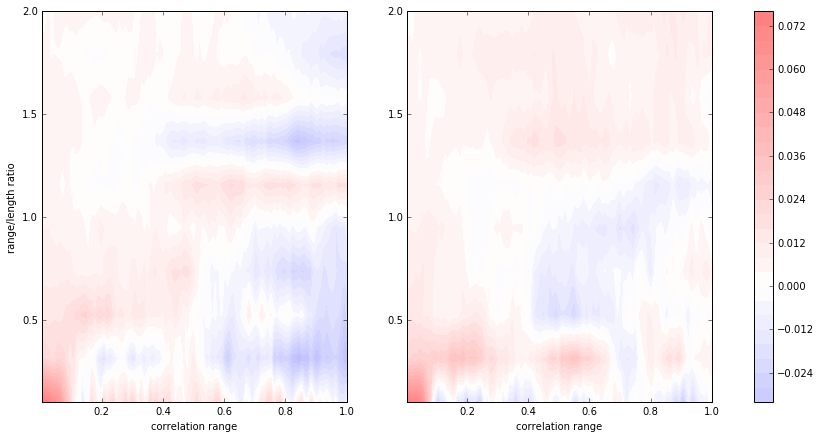

In [9]:
# Plot comparison
fig, axes = plt.subplots(nrows=1, ncols=2)
c = plot_deltas(fig, axes[0], mid, deltas[0])
c = plot_deltas(fig, axes[1], mid, deltas[1])
axes[0].set_ylabel('range/length ratio')
axes[0].set_xlabel('correlation range')
axes[1].set_xlabel('correlation range')
fig.colorbar(c, ax=axes.ravel().tolist())

# Exponential

In [10]:
variogram_type = 'exponential'
mid, deltas, tcorr, ecorr = simulate(variogram_type)

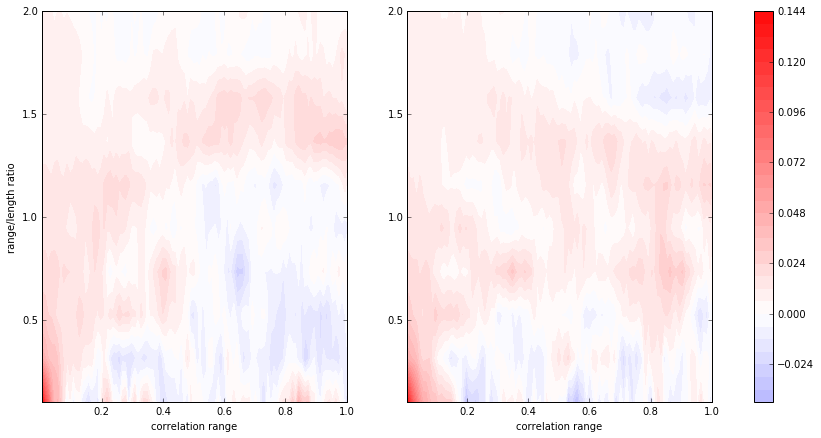

In [11]:
# Plot comparison
fig, axes = plt.subplots(nrows=1, ncols=2)
c = plot_deltas(fig, axes[0], mid, deltas[0])
c = plot_deltas(fig, axes[1], mid, deltas[1])
axes[0].set_ylabel('range/length ratio')
axes[0].set_xlabel('correlation range')
axes[1].set_xlabel('correlation range')
fig.colorbar(c, ax=axes.ravel().tolist())

# Matern52

In [12]:
variogram_type = 'matern52'
mid, deltas, tcorr, ecorr = simulate(variogram_type)

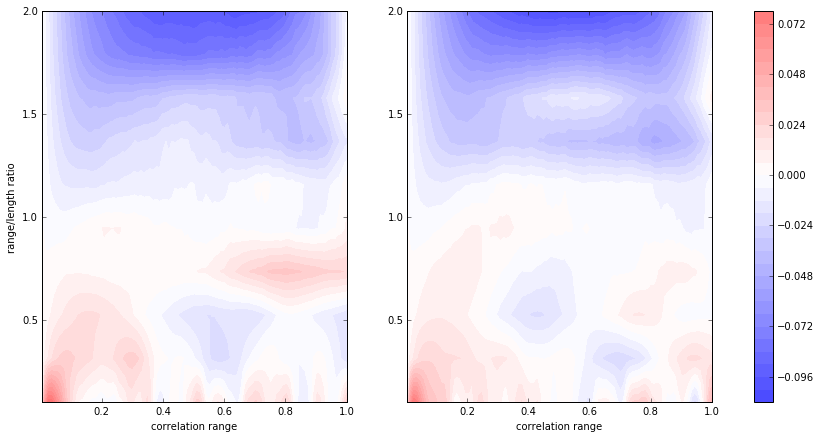

In [13]:
# Plot comparison
fig, axes = plt.subplots(nrows=1, ncols=2)
c = plot_deltas(fig, axes[0], mid, deltas[0])
c = plot_deltas(fig, axes[1], mid, deltas[1])
axes[0].set_ylabel('range/length ratio')
axes[0].set_xlabel('correlation range')
axes[1].set_xlabel('correlation range')
fig.colorbar(c, ax=axes.ravel().tolist())

# General Exponential (1.5)

In [14]:
variogram_type = 'general_exponential'
mid, deltas, tcorr, ecorr = simulate(variogram_type)

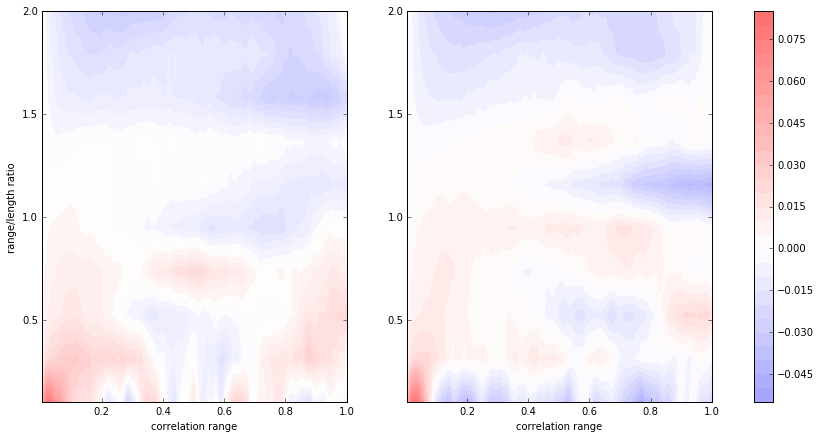

In [15]:
# Plot comparison
fig, axes = plt.subplots(nrows=1, ncols=2)
c = plot_deltas(fig, axes[0], mid, deltas[0])
c = plot_deltas(fig, axes[1], mid, deltas[1])
axes[0].set_ylabel('range/length ratio')
axes[0].set_xlabel('correlation range')
axes[1].set_xlabel('correlation range')
fig.colorbar(c, ax=axes.ravel().tolist())